## Contrast Stretching of Black and White Image:
Contrast of a Black and White Image is fairly straight forward. In Min-Max Contrast Stretching, the lower and upper values of the input image are made to span the full dynamic range. 

In [1]:
#Importing the libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

In [2]:
#Reading the original image, here 0 implies that image is read as grayscale
image = cv2.imread('lc.jpeg', 0)

#Generating the histogram of the original image
hist,bins = np.histogram(image.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

In [7]:
# Create zeros array to store the stretched image
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')
 

# Loop over the image and apply Min-Max Contrasting
min = np.min(image)
max = np.max(image)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)
        
#Generating the histogram of the image after applying Min-Max Contrast Stretchong
hist_cs,bins_cs = np.histogram(image_cs.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf_cs = hist_cs.cumsum()
cdf_cs_normalized = cdf_cs * hist_cs.max()/ cdf_cs.max()

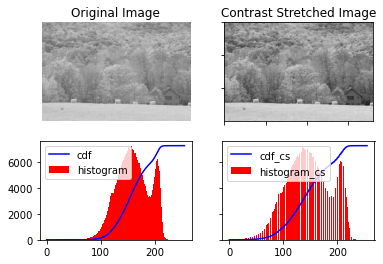

In [8]:
#Plotting the Original and Histogram Equalized Image, Histogram and CDF
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_cs, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 1].set_title('Contrast Stretched Image')


axs[1, 0].plot(cdf_normalized, color = 'b')
axs[1, 0].hist(image.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_cs_normalized, color = 'b')
axs[1, 1].hist(image_cs.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_cs','histogram_cs'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Contrast Stretching of Color Images:
Contrast Stretching of color images is a little complicated. OpenCV loads color images in BGR color space. With this color space, it is not possible to equalize the histogram without affecting to the color information because all 3 channels contain color information. Therefore you have to convert the BGR image to a color space like YCrCb. <br>
In YCrCb color space, the **Y channel** of the image only contains intensity information where as Cr and Cb channels contain all the color information of the image. Therefore only the Y channel should be processed to get an image after applying CLAHE without changing any color information.

In [10]:
#Reading the original image, here 1 implies that image is read as color
image_c = cv2.imread('lc.jpeg', 1)

#Generating the histogram of the original image
hist_c,bins_c = np.histogram(image_c.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf_c = hist_c.cumsum()
cdf_c_normalized = cdf_c * hist_c.max()/ cdf_c.max()

In [16]:
#Converting the image to YCrCb
image_yuv = cv2.cvtColor(image_c, cv2.COLOR_BGR2YUV)


# Loop over the Y channel and apply Min-Max Contrasting
min = np.min(image_yuv[:,:,0])
max = np.max(image_yuv[:,:,0])

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_yuv[:,:,0][i,j] = 255*(image_yuv[:,:,0][i,j]-min)/(max-min)


# convert the YUV image back to RGB format
image_c_cs = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

#Generating the histogram of the image after applying Constrast Stretching
hist_c_cs, bins_c_cs = np.histogram(image_c_cs.flatten(),256,[0,256])

#Generating the cumulative distribution function of the original image
cdf_c_cs = hist_c_cs.cumsum()
cdf_c_cs_normalized = cdf_c_cs * hist_c_cs.max()/ cdf_c_cs.max()


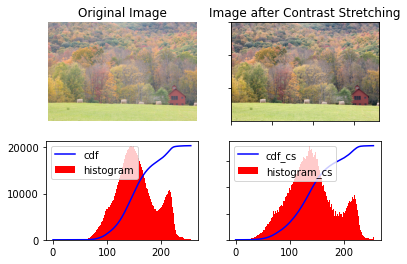

In [17]:
#Plotting the Original and Histogram Equalized Image, Histogram and CDF
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(image_c, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_c_cs, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 1].set_title('Image after Contrast Stretching')


axs[1, 0].plot(cdf_c_normalized, color = 'b')
axs[1, 0].hist(image_c.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_c_cs_normalized, color = 'b')
axs[1, 1].hist(image_c_cs.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_cs','histogram_cs'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()